In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
linestyles = ['-', '--', ':', '-.']

def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

def cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])
    
def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

### 9.1 독립성

$n$개의 확률변수 $X_1,X_2,\dots,X_n$이 다음을 만족할 때, $X_1,X_2,\dots,X_n$은 서로 독립이라고 한다.

$f_{X_1,X_2,\dots,X_n} (x_1,x_2,\dots,x_n) =f_{X_1}(x_1)f_{X_2}(x_2)\dots f_{X_n}(x_n)$

다만, 함수$f$가 이산형이면 확률함수, 연속형이면 밀도함수를 나타낸다.

In [4]:
x_set = np.array([1,2,3,4,5,6])
y_set = np.array([1,2,3,4,5,6])

def f_XY(x, y):
    if x in x_set and y in y_set:
        return x*y/441
    else:
        return 0
XY = [x_set, y_set, f_XY]

In [5]:
cov(XY)

-8.326672684688674e-17

In [6]:
# 무상관이지만 독립이 아닌 경우

x_set = np.array([0,1])
y_set = np.array([-1,0,1])

def f_XY(x, y):
    if (x, y) in [(0,0),(1,1),(1,-1)]:
        return 1/3
    else:
        return 0
XY = [x_set, y_set, f_XY]

In [7]:
cov(XY)

0.0

In [8]:
f_X(0)*f_Y(0), f_XY(0, 0)

(0.1111111111111111, 0.3333333333333333)

### 9.2 합의 분포

확률변수$X_1,X_2,\dots,X_n$에 관해서

$E(X_1+X_2+\dots+X_n)=E(X_1)+E(X_2)+\dots+E(X_n)$

이 성립힌다.

확률변수 $X_1,X_2,\dots,X_n$이 서로 독립이라면

$V(X_1+X_2+\dots+X_n)=V(X_1)+V(X_2)+\dots+V(X_n)$

이 성립한다.

#### 정규분포의 합의 분포
서로 독립인 확률변수 $X_1\sim N(\mu_1,\sigma_1^2),X_2\sim N(\mu_2,\sigma_2^2),\dots,X_n\sim N(\mu_n,\sigma_n^2)$에 관해서

$\sum_{i=1}^n X_i\sim N\left(\sum_{i=1}^n \mu_i,\sum_{i=1}^n \sigma_i^2 \right)$

이 성립한다.

In [9]:
rv1 = stats.norm(1, np.sqrt(2))
rv2 = stats.norm(2, np.sqrt(3))

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)

(3.0026658204893835, 4.9960524321119335)

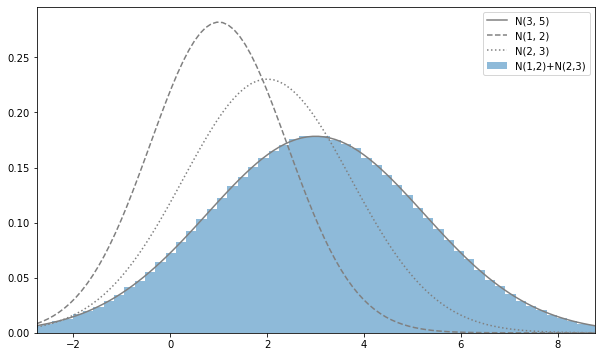

In [10]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.norm(3, np.sqrt(5))
xs = np.linspace(rv.isf(0.995), rv.isf(0.005), 100)

ax.hist(sum_sample, bins=100, density=True, alpha=0.5, label='N(1,2)+N(2,3)')
ax.plot(xs, rv.pdf(xs), label='N(3, 5)', color='gray')
ax.plot(xs, rv1.pdf(xs), label='N(1, 2)', ls='--', color='gray')
ax.plot(xs, rv2.pdf(xs), label='N(2, 3)', ls=':', color='gray')

ax.legend()
ax.set_xlim(rv.isf(0.995), rv.isf(0.005))
plt.show()

#### 포아송 분포의 합의 분포
서로 독립인 확률변수 $X_1\sim Poi(\lambda_1),X_2\sim Poi(\lambda_2),\dots,X_n\sim Poi(\lambda_n)$에 관해서

$\sum_{i=1}^n X_i\sim Poi\left(\sum_{i=1}^n\lambda_i\right)$

가 성립한다.

In [11]:
rv1 = stats.poisson(3)
rv2 = stats.poisson(4)

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)

(6.999034, 6.989995066843997)

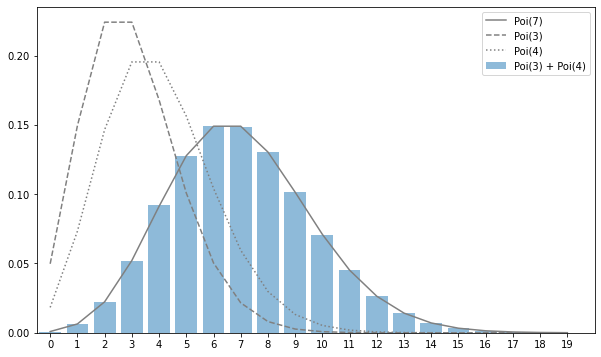

In [12]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.poisson(7)
xs = np.arange(20)
hist, _ = np.histogram(sum_sample, bins=20, range=(0,20), normed=True)

ax.bar(xs, hist, alpha=0.5, label='Poi(3) + Poi(4)')
ax.plot(xs, rv.pmf(xs), label='Poi(7)', color='gray')
ax.plot(xs, rv1.pmf(xs), label='Poi(3)', ls='--', color='gray')
ax.plot(xs, rv2.pmf(xs), label='Poi(4)', ls=':', color='gray')

ax.legend()
ax.set_xlim(-0.5, 20)
ax.set_xticks(np.arange(20))
plt.show()

#### 베르누이 분포의 합의 분포
$X_1,X_2,\dots,X_n\stackrel{iid}{\sim}Bern(p)$에 관해서

$\sum_{i=1}^n X_i\sim B(n,p)$

가 성립한다.

In [13]:
p = 0.3
rv = stats.bernoulli(p)

sample_size = int(1e6)
Xs_sample = rv.rvs((10, sample_size))
sum_sample = np.sum(Xs_sample, axis=0)

np.mean(sum_sample), np.var(sum_sample)

(2.999494, 2.0946717439639984)

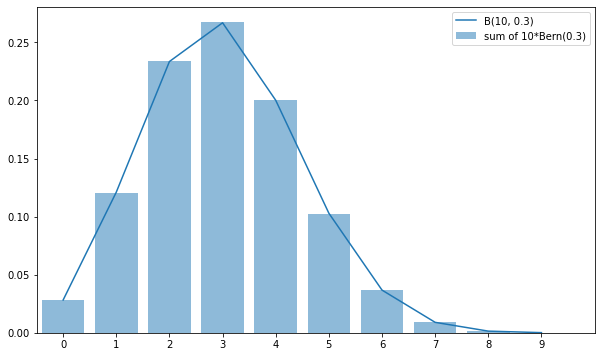

In [16]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.binom(10, p)
xs = np.arange(10)
hist, _ = np.histogram(sum_sample, bins=10, range=(0,10), normed=True)
ax.bar(xs, hist, alpha=0.5, label='sum of 10*Bern(0.3)')
ax.plot(xs, rv.pmf(xs), label='B(10, 0.3)')
ax.set_xlim(-0.5, 10)
ax.set_xticks(np.arange(10))
ax.legend()
plt.show()

### 9.3 표본평균의 분포

#### 표본평균의 기댓값과 분산
확률변수$X_1,X_2,\dots,X_n$이 서로 독립이고, 기댓값이$\mu,$분산이$\sigma^2$인 확률분포$F$를 따를 때

$E(\overline{X})=\mu\\
V(\overline{X})=\frac{\sigma^2}{n}$

이 성립한다.

#### 정규분포의 표본평균의 분포
$X_1, X_2,\dots,X_n\stackrel{iid}{\sim}N(\mu,\sigma^2)$이라고 할 때

$\overline{X}\sim N\left(\mu,\frac{\sigma^2}{n}\right)$

이 성립한다.

In [17]:
mean = 1
var = 2
rv = stats.norm(mean, np.sqrt(var))

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean)

(0.9995466511402974, 0.19942119653587653)

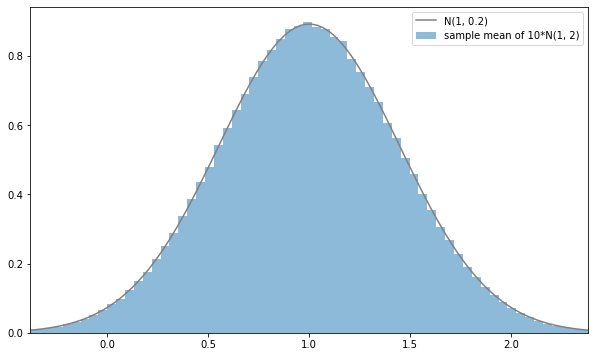

In [18]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv_true = stats.norm(mean, np.sqrt(var/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)
ax.hist(sample_mean, bins=100, density=True, alpha=0.5, label='sample mean of 10*N(1, 2)')
ax.plot(xs, rv_true.pdf(xs), label='N(1, 0.2)', color='gray')

ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

#### 포아송 분포의 표본평균 분포

In [20]:
l = 3
rv = stats.poisson(l)

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean)

(3.0003767999999997, 0.30001375802176)

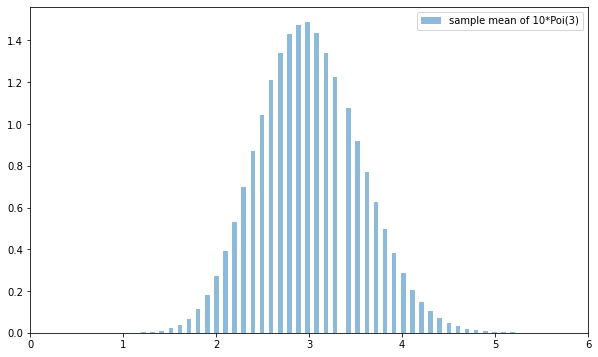

In [21]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True, alpha=0.5, label='sample mean of 10*Poi(3)')
ax.legend()
ax.set_xlim(0, 6)
plt.show()

#### 중심극한정리
확률변수$X_1,X_2,\dots,X_n$이 서로 독립이고, 기댓값이 $\mu,$ 분산이 $\sigma^2$인 확률분포 $F$를 따를 때, $n$이 커짐에 따라 표본평균 $\overline{X}$의 분포는 정규분포 $N\left(\mu,\frac{\sigma^2}{n}\right)$에 가까워진다.

In [22]:
l = 3
rv = stats.poisson(l)

n = 10000
sample_size = 10000
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

rv_true = stats.norm(l, np.sqrt(l/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)

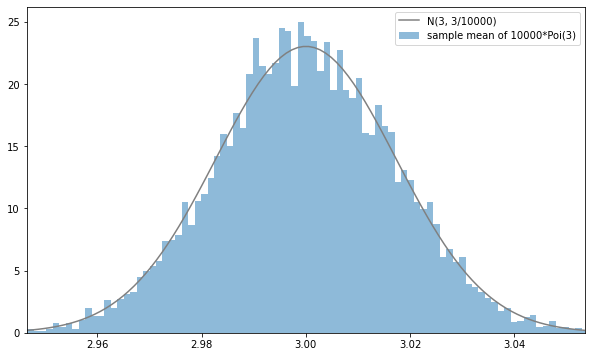

In [24]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins=100, density=True, alpha=0.5, label='sample mean of 10000*Poi(3)')
ax.plot(xs, rv_true.pdf(xs), label='N(3, 3/10000)', color='gray')
ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

#### 대수의 법칙
확률변수 $X_1,X_2,\dots,X_n$이 서로 독립이고, 평균이 $\mu$, 분산이 $\sigma^2$일 것 같은 확률분포를 따를 때, $n$이 커짐에 따라 표본평균은 $\mu$에 수렴한다.

In [36]:
p = 1/6
rv = stats.bernoulli(p)

n = int(1e5)
sample = rv.rvs((n, 4))
space = np.linspace(100, n, 50).astype(int)
plot_list = np.array([np.mean(sample[:sp], axis=0) for sp in space]).T

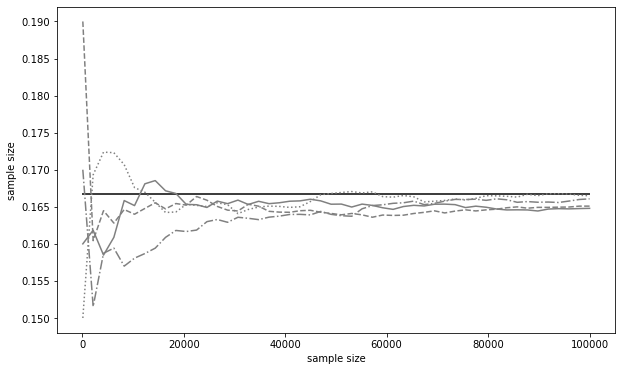

In [37]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

for pl, ls in zip(plot_list, linestyles):
    ax.plot(space, pl, ls=ls, color='gray')
ax.hlines(p, -1, n, 'k')
ax.set_xlabel('sample size')
ax.set_ylabel('sample size')

plt.show()